# <p style="text-align: center;">Black Friday Sales</p>

![Image](https://s17026.pcdn.co/wp-content/uploads/sites/9/2017/11/Black-Friday-291117.jpeg)

##  Problem Statement :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16,8)

### Data Preprocessing

In [2]:
#Importing dataset
train_data = pd.read_csv('./Downloads/black_friday_train.csv')
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
test_data = pd.read_csv('./Downloads/black_friday_test.csv')
test_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [4]:
#Concatinating both data sets
data = pd.concat([train_data,test_data],axis=0)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
#Dropping columns
data.drop(columns='User_ID',inplace=True)

In [8]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


## Exploratory Data Analysis

In [9]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


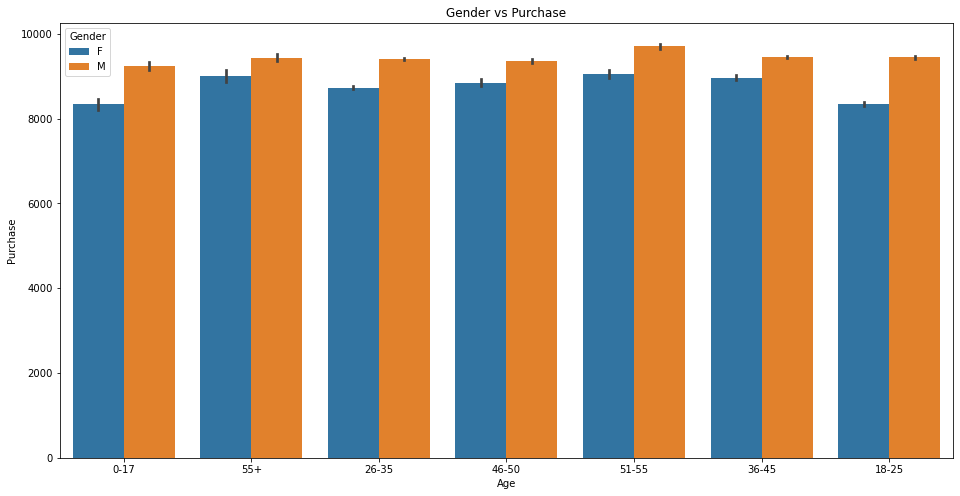

In [10]:
sns.barplot(x = 'Age', y = 'Purchase', hue = 'Gender', data = data)
plt.title('Gender vs Purchase');

### Observation: It has been clear that male has highest number of purchases as compared to Female, which is strange, lol!

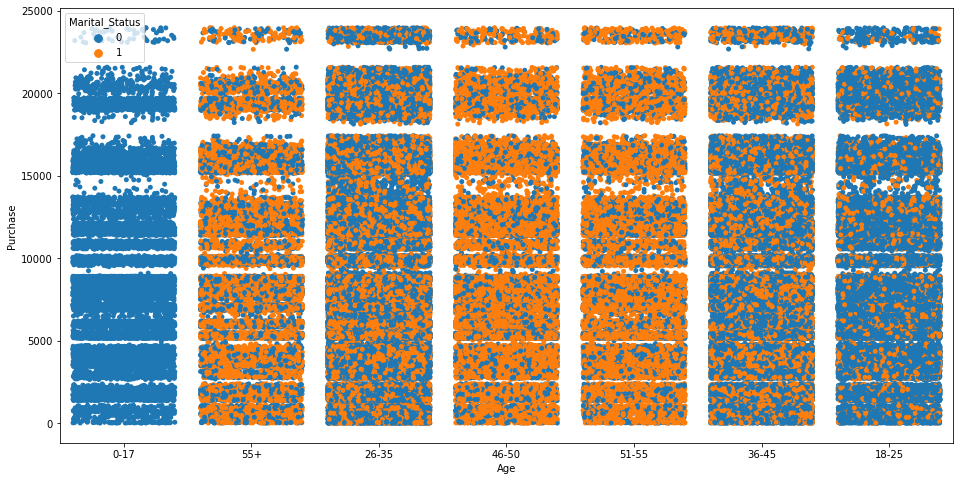

In [11]:
sns.stripplot(x = 'Age', y = 'Purchase', data = data, hue = 'Marital_Status', jitter=0.4);

### Observation: There is still some population who isn't married at the age of 35+, lol!

In [12]:
data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

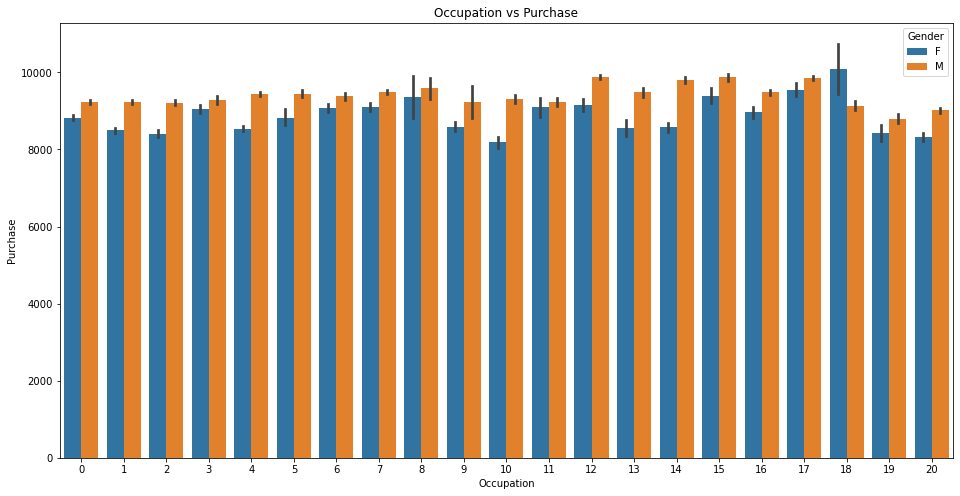

In [13]:
sns.barplot(data = data, x = 'Occupation', y = 'Purchase', hue = 'Gender')
plt.title('Occupation vs Purchase');

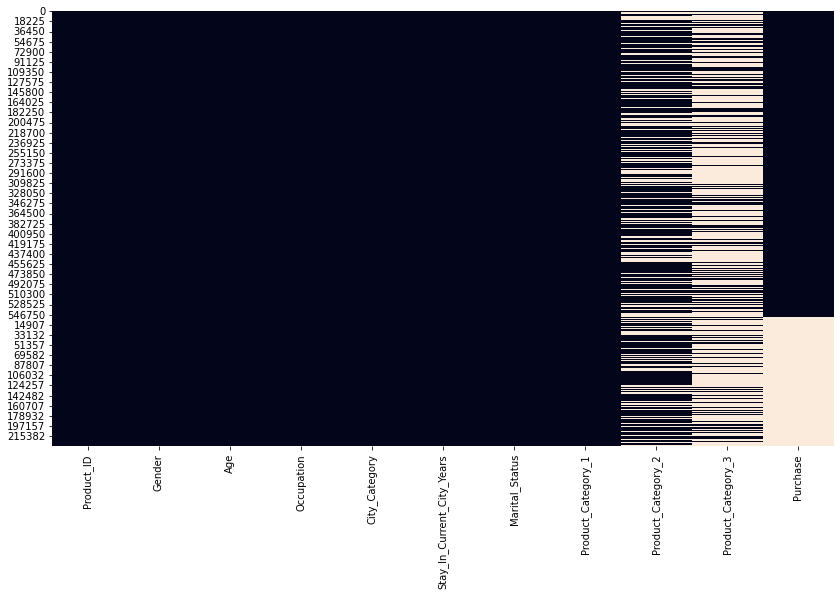

In [14]:
#Missing values can be easily spotted in the heatmap
plt.figure(figsize=(14,8))
sns.heatmap(data.isnull(),cbar=False);

In [15]:
#Gender
data['Gender'] = np.where(data['Gender']=='M',1,0)

In [16]:
#Age --> Target Guiding OR Can use Label Encoding
data['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [17]:
# Importing Scikit learn
# from sklearn.preprocessing import LabelEncoder
# lr = LabelEncoder()

# #Fiting the Label Encoder
# data['Age'] = lr.fit_transform(data['Age']) --> Can't perform as the dataframe contains both training and testing data

#It is not recommended to perform lr.fit_tranform on test data

data['Age'] = data['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [18]:
#Another way for fixing Cath
data['City_Category'] = data['City_Category'].map({'A':0,'B':1,'C':2})

In [19]:
data.dtypes

Product_ID                     object
Gender                          int32
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [20]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,0,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,0,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,2,4+,0,8,NaN,NaN,7969.0


In [21]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].str.replace('+','').astype(int)

C:\Users\Z0166121\AppData\Local\Temp\ipykernel_6824\2807068195.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].str.replace('+','').astype(int)


In [22]:
#Verifying missing values
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [23]:
data['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [24]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0])

In [25]:
data['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [26]:
data['Product_Category_3'] = data['Product_Category_3'].fillna(data['Product_Category_3'].mode()[0])

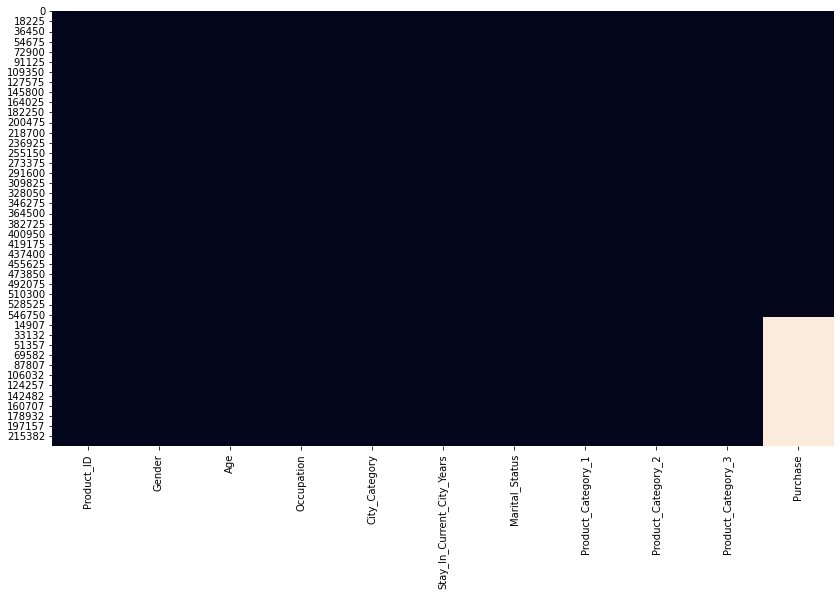

In [27]:
plt.figure(figsize=(14,8))
sns.heatmap(data.isnull(),cbar=False);

#One thing to notice is the Purchase section which contains missing values in the end. They shouldn't be eliminated 
#as they are not but our test data which we contacted in the begining if you remember and ofcourse they will be missing

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int32  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int32(2), int64(5), object(1)
memory usage: 65.8+ MB


In [29]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,2,4,0,8,8.0,16.0,7969.0


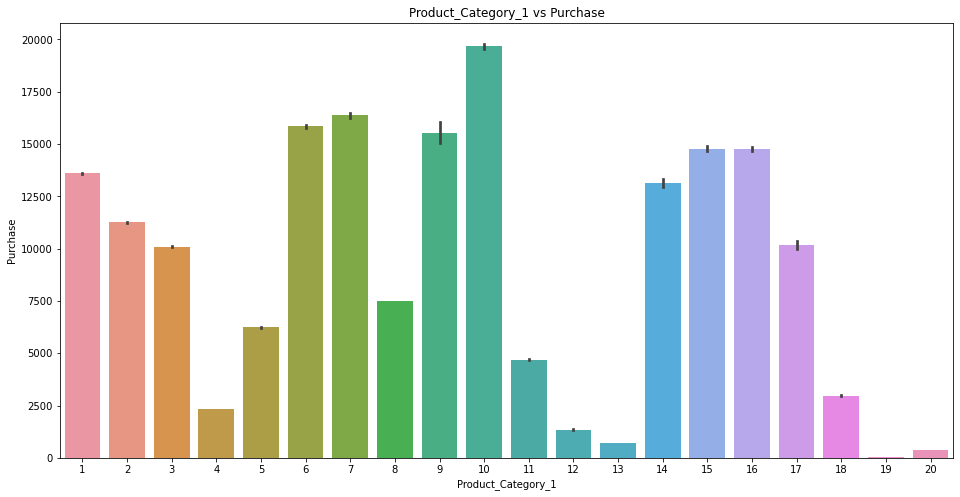

In [30]:
sns.barplot(x='Product_Category_1',y='Purchase',data=data)
plt.title('Product_Category_1 vs Purchase');

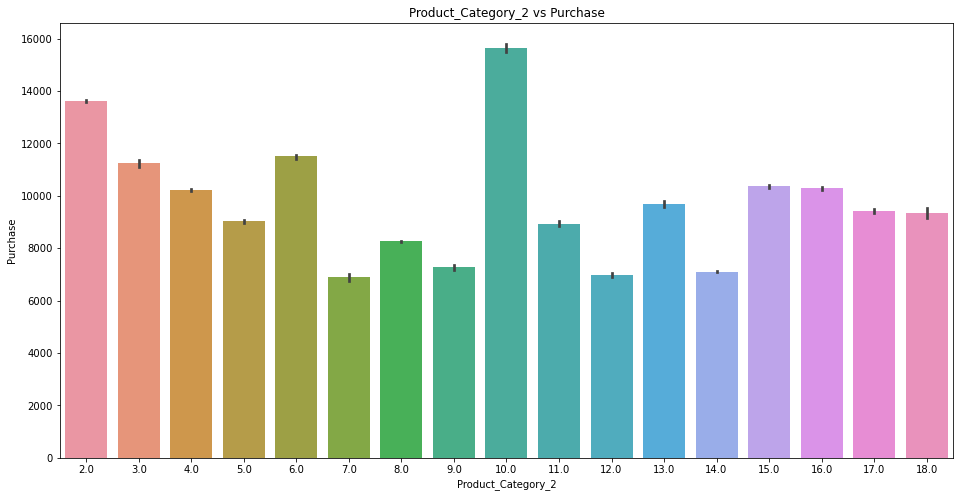

In [31]:
sns.barplot(x='Product_Category_2',y='Purchase',data=data)
plt.title('Product_Category_2 vs Purchase');

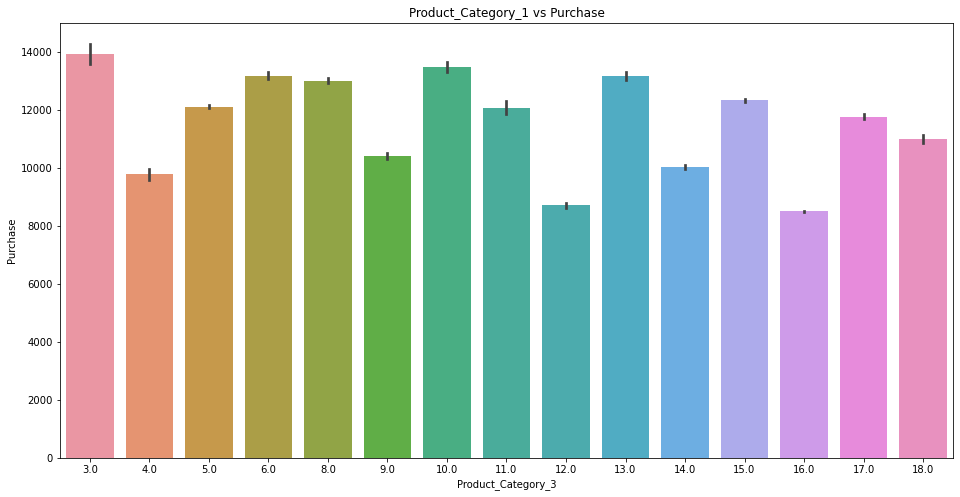

In [32]:
sns.barplot(x='Product_Category_3',y='Purchase',data=data)
plt.title('Product_Category_1 vs Purchase');

### Observation:
- In terms of Products, category 1 items were purchased mostly i.e. ~20000, following by category 2 i.e ~15560 and category 3 ~ < 14000
- In Product Category 1, product 10 has been mostly sold
- In Product Category 2, same product 10 has been mostly sold
- In Product Category 3, product 3 has been mostly sold

## Spliting Training and Testing Data

#### Caution : I can't use train_test_split here as it will randomly chose any data from the dataframe. Initially from Kaggle I got the training and testing data sepearetely, so need to brainstrom a bit and split it

In [33]:
#Test data
test_data = data[data['Purchase'].isnull()]

In [34]:
#Train data
train_data = data.dropna()

In [35]:
test_data.drop(columns='Purchase',inplace=True)

C:\Users\Z0166121\AppData\Local\Temp\ipykernel_6824\2936549304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(columns='Purchase',inplace=True)


In [36]:
#X_train
X = train_data

In [37]:
X_train = X.drop(columns=['Purchase'])
X_train

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,0,1,10,0,2,0,3,8.0,16.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0
2,P00087842,0,1,10,0,2,0,12,8.0,16.0
3,P00085442,0,1,10,0,2,0,12,14.0,16.0
4,P00285442,1,7,16,2,4,0,8,8.0,16.0
...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,1,1,1,20,8.0,16.0
550064,P00375436,0,3,1,2,3,0,20,8.0,16.0
550065,P00375436,0,3,15,1,4,1,20,8.0,16.0
550066,P00375436,0,7,1,2,2,0,20,8.0,16.0


In [38]:
#y_train
y_train = X['Purchase']
y_train

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [39]:
#X_test
X_test = test_data
X_test

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00128942,1,5,7,1,2,1,1,11.0,16.0
1,P00113442,1,3,17,2,0,0,3,5.0,16.0
2,P00288442,0,4,1,1,4,1,5,14.0,16.0
3,P00145342,0,4,1,1,4,1,4,9.0,16.0
4,P00053842,0,3,1,2,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,1,4,1,8,8.0,16.0
233595,P00254642,0,3,15,1,4,1,5,8.0,16.0
233596,P00031842,0,3,15,1,4,1,1,5.0,12.0
233597,P00124742,0,5,1,2,4,0,10,16.0,16.0


## Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [41]:
X_train.drop(columns='Product_ID',inplace=True)
X_test.drop(columns='Product_ID',inplace=True)

C:\Users\Z0166121\AppData\Local\Temp\ipykernel_6824\3902156579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns='Product_ID',inplace=True)


In [42]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training Model and getting predictions

In [43]:
#Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [44]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [45]:
y_pred = dt.predict(X_test)
pd.DataFrame(y_pred)

,0
0,19576.000000
1,10636.000000
2,8247.090909
3,3549.000000
4,2743.000000
...,...
233594,6824.656863
233595,5589.866667
233596,15622.000000
233597,23714.000000


### Above are the predicted results which can help us to achieve the targets for the upcoming black friday